# Create a model

For this exercise we are not going to setup a new network from scratch, rather we are going to use VGG16 model. This model has already been fit on ImageNet database and thus we could use the pre-trained weights for our exercise. The model was used in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) and achieved the top result in 2014. For further details to could refer to [VGG16](https://neurohive.io/en/popular-networks/vgg16/).

If this is the first time you are going to run the VGG16 model, then your script is going to download the pre-trained network weights. The size of the download is somewhere around 500 mbytes. It might take time to download depending on your internet download speed.

In [1]:
from tensorflow.keras.applications import VGG16

# load the model
model = VGG16()

# print the summary of model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

The model is organised into set of few 2D convolutional layers, maxpooling and dense layers. Our model is now ready to be used.

### Fetch weights for convolutional layers

In [2]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


We are only interested in finding out the filters used and the feature map generated by the convolutional layers. In neural network terminology, the filter of a convolutional layer is the weights of that layer. These weights are two-dimensional matrix and thus could be plotted easily to have a visual understanding of how they operate.

### Visualize the filters of the first convolutional layer

We will focus on the filters and the feature maps of the first convolutional layer. By looking at the output shape of block1_conv1 layer, we could see it is of shape (None, 224, 224, 64). The first argument here signifies the batch size. The output has a size of 224 * 224 with 64 number of features. We will look at the first 6 features.

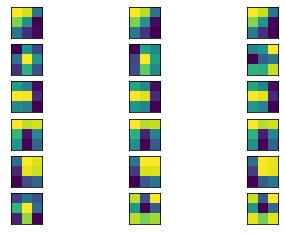

In [3]:
from tensorflow.keras.applications import VGG16
from matplotlib import pyplot
model = VGG16()

# get the filters and biases of the first layer
filters, biases = model.layers[1].get_weights()

# find the minimum and the maximum value of the filters
# and use these values to normalize the filter
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(3):
        # each image has three channels for RGB
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # pyplot.imshow(f[:, :, j], cmap="gray")
        pyplot.imshow(f[:, :, j])
        ix += 1
        
pyplot.show()

Looking at the above filters we can see that sometimes the filters are same across the channels while at other is completely different for all channels. The dark squares indicate small or inhibitory weights while the lighter ones indicate a higher weight value. One could also plot a graymap version of the same filters by including ```cmap='gray'```.

### Visualize the feature maps

We will load an image and convert it to a size of 224 * 224 pixels. As the output for the first convolutional layer has 64 features, we will plot them in a 8 * 8 square sized plot.

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


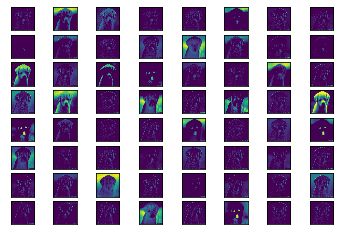

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

# load an image and resize it to 224*224 pixels
img = load_img("puppy.jpg", target_size=(224, 224))

# convert the image into an array
img = img_to_array(img)

# add a new dimension for the number of images. The output would be (1, 224, 224, 3)
img = expand_dims(img, axis=0)

# preprocess image and normalize
img = preprocess_input(img)

feature_maps = model.predict(img)

square = 8
ix = 1

for _ in range(square):
    for _ in range(square):
        # pyplot.subplot needs three arguments (rows, cols, ix)
        # where rows and cols are the number of rows and columns to be made in the subplot,
        # while idx is the index of the subplot, starting from a value of 1 from top left corner and incrementing by 1 
        # towards lower right corner
        ax = pyplot.subplot(square, square, ix)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Numpy arrays indexing starts from 0. That is why for the array feature_maps we have [0, :, :, ix-1]
        # else at index 64 in the subplot we will have out of bound indexing error.
        # To mitigate that we start from 0 (ix-1) and go to 63.
        pyplot.imshow(feature_maps[0, :, :, ix-1])
        
        # to plot the feature maps in gray scale one could write
        # pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
    
pyplot.show()